<br>
<h1 style = "font-size:50px; font-family:Helvetica ; font-weight : normal; color : #fe346e; text-align: center;"> Exploratory Data Analysis</h1>
<h2 style = "font-size:40px; font-family:Helvetica ; font-weight : normal; text-align: center;"> Classification </h2>
<br><br>

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715612126/EDA/dw1xwbh1g2c85izletjs.png' width="200"  style="float:center" align="center"/>

<br>

<div style='padding:15px'>
<a href="https://colab.research.google.com/github/rribeiro-sci/EDA_laboratory/blob/main/5-Classification.ipynb" target="_blank">
<img alt="Colab" src="https://res.cloudinary.com/djz27k5hg/image/upload/v1637335713/badges/colab-badge_hh0uyl.svg" height="25" style="margin:20px">
</a>

</div> 



# Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


data = {
    'concentration': [0, 5, 10, 12, 17, 20, 25],
    'absorbance': [0, 0.1824, 0.3146, 0.3698, 0.4879,0.5498,0.6100]
}

df = pd.DataFrame(data)
df

,concentration,absorbance
0,0,0.0000
1,5,0.1824
2,10,0.3146
3,12,0.3698
4,17,0.4879
5,20,0.5498
6,25,0.6100


In [2]:
# Extract concentration and absorbance values
concentration = df['concentration'].values.reshape(-1, 1)  # Reshape for sklearn (THIS IS IMPORTANT)
absorbance = df['absorbance'].values

In [3]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(concentration, absorbance)

LinearRegression(fit_intercept=False)

In [4]:
model.__dict__

{'fit_intercept': False,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.02718629]),
 'rank_': 1,
 'singular_': array([39.78693253]),
 'intercept_': 0.0}

In [5]:
# Get the slope and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Print the linear regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {model.score(concentration, absorbance)}")

Slope: 0.027186291850915978
Intercept: 0.0
R-squared: 0.9588935501773767


In [6]:
# Generate values for the fitted line
fitted_absorbance = model.predict(concentration)


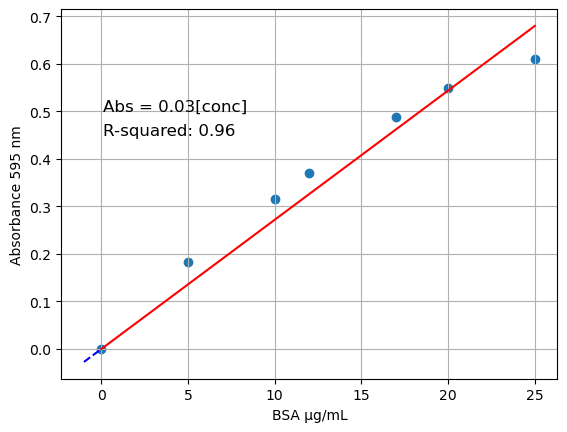

In [7]:
# Plot the data points
plt.scatter(concentration, absorbance, label='Data Points')

# Plot the fitted line
plt.plot(concentration, fitted_absorbance, color='red', label='Fitted Line')

# Plot a line passing through the origin with the same slope as the fitted line
origin_line_x = np.array([-1, np.min(concentration)])  # Use np.max() to get the maximum concentration value
origin_line_y = slope * origin_line_x
plt.plot(origin_line_x, origin_line_y, linestyle='--', color='blue', label='Line through Origin')

# Add labels and title
plt.xlabel('BSA µg/mL')
plt.ylabel('Absorbance 595 nm')
plt.grid()

# Annotate the equation of the line and the R-squared value
equation_text = f'Abs = {slope:.2f}[conc]'
rsquared_text = f'R-squared: {model.score(concentration, absorbance):.2f}'
plt.text(0.1, 0.5, equation_text, fontsize=12, color='black')
plt.text(0.1, 0.45, rsquared_text, fontsize=12, color='black')

# Show the plot
plt.show()



# Logistic Fit

In [8]:
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

In [9]:
x_data = np.array([ 2.04335340e+04, 8.53159941e+04,
                    3.56219283e+05, 1.48731992e+06,
                    6.20999665e+06, 1.26892178e+07,
                    1.08259323e+08, 2.21212056e+08, 
                    1.88729264e+09, 3.85640584e+09])

y_data = np.array([ 1.91360620e+04, 1.90926959e+04,
                    1.89137725e+04, 1.81963673e+04,
                    1.53607779e+04, 5.53058869e+03,
                    2.12431583e+02, 3.95457265e+01,
                    2.02482030e+01, 1.64053172e+01])

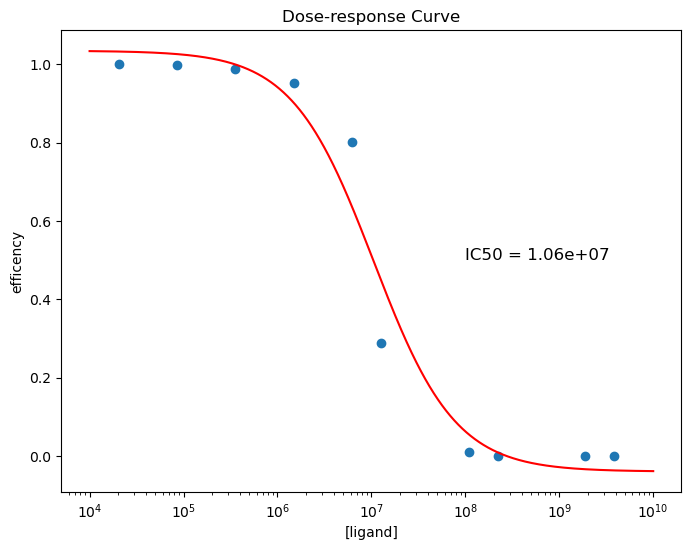

In [10]:
# Normalize the y_data using MinMaxScaler
scaler = MinMaxScaler()
y_data_normalized = scaler.fit_transform(y_data.reshape(-1, 1)).flatten()


def eqfit(x, bottom, top, kd):
    
    return bottom + (top-bottom)/(1+(x/kd))


popt, pcov = curve_fit(eqfit, x_data, y_data_normalized, maxfev=5000)

xfit = np.geomspace(1E4,1E10, 50000)
yfit = eqfit(xfit, *popt)


plt.figure(figsize=(8,6))
plt.scatter(x_data,y_data_normalized)
plt.plot(xfit, yfit, 'r')
plt.title('Dose-response Curve')
plt.xlabel('[ligand]')
plt.ylabel('efficency')

# Annotate the fitted parameters
IC50 = popt[-1]
text = f'IC50 = {IC50:.2e}'
plt.text(1E8, 0.5, text, fontsize=12, color='black')


plt.xscale('log')


# Classification models that will predict which class the flower is based on petal and sepal sizes


In [11]:
# Importing libraries
from sklearn import datasets
import numpy as np

# importing iris dataset
iris = datasets.load_iris()



### Standardize


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_data =scaler.fit_transform(iris.data)



### Split the dataset into train and test data

Creating a train and test class. As the names suggest, we will train our model on the train set, and test the model on the test set. We will randomly select **80% of the data to be in our training, and 20% as test.**




In [13]:
# Importing splitter from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, iris.target, test_size=0.2, random_state=1, stratify = iris.target) 

by "stratifying" on `iris.target` we assure that the different classes are represented proportionally to the amount in the total data (this makes sure that all of class 1 is not in the test group only

## k-Nearest-Neighbors Model

k-NN is a **supervised machine learning model**.The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data. 
 


### Building and training the model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model  = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

### Testing the model

Once the model is trained, we can use the `predict()` method on our model to make predictions on our test data.

In [15]:
y_pred = knn_model.predict(X_test)
y_pred

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

### Is our model accurate?

we can use the `score()` method and pass in our test input and target data to see how well our model predictions match up to the actual results. 

Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It's a straightforward metric that tells you how often the classifier is correct.

In [16]:
knn_model.score(X_test, y_test)

0.9666666666666667

### Evaluating model's performance

In machine learning, there are different evaluation metrics: 
* Confusion Matrix
* F1 score, 
* Precision
* Recall

#### Confusion Matrix

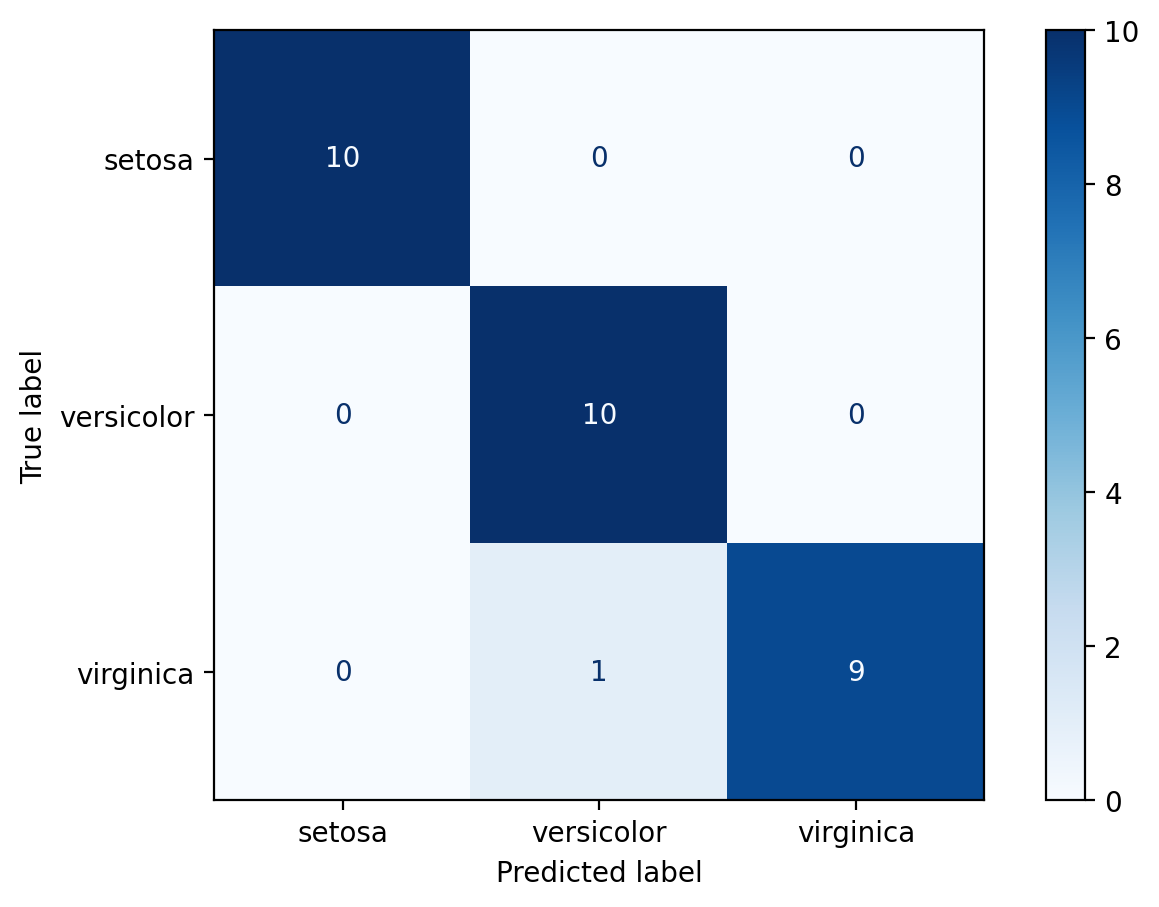

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


cm = confusion_matrix(y_test, y_pred)
cm_heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=iris.target_names, )



fig, ax = plt.subplots(figsize=(8,5))

cm_heatmap.plot(ax=ax, cmap=plt.cm.Blues,)

plt.show()


#### How to interpret the confusion matrix?

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

### F1 score

The F1 score is the harmonic mean of precision and recall. F1 score = 2 / (1 / Precision + 1 / Recall)

* **Precision:** Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It measures the accuracy of positive predictions.

* **Recall:** Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances in the data. It measures the model's ability to capture all positive instances.

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro') #when you want to know the overall performance of the model across all classes, treating each class equally.

0.9665831244778613

## Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## k-Fold Cross-Validation

Cross-validation is when the dataset is randomly split up into ‘k’ groups. One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group as been used as the test set.

<img src='https://res.cloudinary.com/djz27k5hg/image/upload/v1715848525/EDA/tgu7pavh49kiixdnuloa.webp' width="600" style="float:center" />
<br>

Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

In [20]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)


In [21]:
y=iris.target
scores=[]
f1=[]
for train_index, test_index in kf.split(X_data):
    kf_X_train, kf_X_test = X_data[train_index], X_data[test_index]
    kf_y_train, kf_y_test = y[train_index], y[test_index]

    knn_model  = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(kf_X_train, kf_y_train)
    kf_y_pred = knn_model.predict(kf_X_test)

    score = round(knn_model.score(kf_X_test, kf_y_test),3)
    f1_score_macro = round(f1_score(kf_y_test, kf_y_pred, average='macro'),3)
    scores.append(score)
    f1.append(f1_score_macro)
    print(score, f1_score_macro)


1.0 1.0
0.867 0.867
1.0 1.0
0.867 0.786
1.0 1.0
1.0 1.0
0.933 0.945
1.0 1.0
0.867 0.867
0.933 0.93


In [22]:
print(np.mean(scores))
print(np.mean(f1))

0.9466999999999999
0.9395


This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.